In [ ]:


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
from glob import glob
import imageio
from sklearn.preprocessing import LabelBinarizer
import shutil
from tensorflow.keras.models import load_model
import optuna
from keras.applications import EfficientNetV2B0
from re import VERBOSE
import gc
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import optuna.visualization as optuna_viz



In [ ]:
pip install optuna matplotlib

In [ ]:


# Replace '/content/drive/MyDrive/Dataset/train_dataset' with your actual train path
source_path = '/content/Splitdataset0101/MyDrive/train_dataset'
destination_path = '/content/local_train_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)


'/content/local_train_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/valid_dataset'
destination_path = '/content/local_Valid_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_Valid_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/test_dataset'
destination_path = '/content/local_test_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_test_dataset'

In [ ]:
# all train class names...
train_dir = sorted(os.listdir('/content/local_train_dataset'))
class_names_lst = [dir_name for dir_name in train_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
test_dir = sorted(os.listdir('/content/local_test_dataset'))
class_names_lst = [dir_name for dir_name in test_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
val_dir = sorted(os.listdir('/content/local_Valid_dataset'))
class_names_lst = [dir_name for dir_name in val_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
data_path = '/content/'
train_dir = os.path.join(data_path,'local_train_dataset')
test_dir = os.path.join(data_path, 'local_test_dataset')
val_dir = os.path.join(data_path, 'local_Valid_dataset')

In [ ]:
images_path= os.path.join(train_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
train_images = []
train_labels = []
for i in images:
    train_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    train_labels.append(i.split('/')[-2])
train_X = np.asarray(train_images)
train_Y = pd.DataFrame(train_labels)

In [ ]:
images_path= os.path.join(val_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
valid_images = []
valid_labels = []
for i in images:
    valid_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    valid_labels.append(i.split('/')[-2])
valid_X = np.asarray(valid_images)
valid_Y = pd.DataFrame(valid_labels)

In [ ]:
images_path= os.path.join(test_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
test_images = []
test_labels = []
for i in images:
    test_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    test_labels.append(i.split('/')[-2])
test_X = np.asarray(test_images)
test_Y = pd.DataFrame(test_labels)

In [ ]:
# Get a list of subdirectories (categories) in the train path
categories = [category for category in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, category))]

# Initialize total count
total_images = 0

# Print the count of images in each category and accumulate the total count
for category in categories:
    category_path = os.path.join(source_path, category)
    num_images = len(os.listdir(category_path))
    total_images += num_images
    print(f"Category: {category}, Number of Images: {num_images}")

# Print the total count of images across all categories
print(f"\nTotal Number of Images Across All Categories: {total_images}")

Category: Shepherd’s Purse, Number of Images: 29
Category: Loose Silky-bent, Number of Images: 78
Category: Scentless Mayweed, Number of Images: 62
Category: Common wheat, Number of Images: 23
Category: Common Chickweed, Number of Images: 66
Category: Charlock, Number of Images: 50
Category: Sugar beet, Number of Images: 54
Category: Maize, Number of Images: 18
Category: Fat Hen, Number of Images: 51
Category: Small-flowered Cranesbill, Number of Images: 51
Category: Cleavers, Number of Images: 31
Category: Black-grass, Number of Images: 41

Total Number of Images Across All Categories: 554


In [ ]:
test_Y

,0
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
549,Scentless Mayweed
550,Scentless Mayweed
551,Scentless Mayweed
552,Scentless Mayweed


In [ ]:
train_Y.rename(columns={0:'species'},inplace=True)
_, train_count = np.unique(train_Y,return_counts=True)
train_df = pd.DataFrame(data = train_count)
a = train_Y['species'].unique()
a = a.tolist()
a.sort()
train_df['Index'] = a
train_df.columns = ['Train','Name']
train_df

,Train,Name
0,212,Black-grass
1,323,Charlock
2,252,Cleavers
3,541,Common Chickweed
4,177,Common wheat
5,387,Fat Hen
6,556,Loose Silky-bent
7,189,Maize
8,414,Scentless Mayweed
9,187,Shepherd’s Purse


In [ ]:
y_train = LabelBinarizer().fit_transform(train_Y.species)
train_label = np.array(y_train,dtype=np.float32)
train_label

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
valid_Y.rename(columns={0:'species'},inplace=True)
_, valid_count = np.unique(valid_Y,return_counts=True)
valid_df = pd.DataFrame(data = valid_count)
a = valid_Y['species'].unique()
a = a.tolist()
a.sort()
valid_df['Index'] = a
valid_df.columns = ['Valid','Name']
valid_df

,Valid,Name
0,56,Black-grass
1,79,Charlock
2,52,Cleavers
3,106,Common Chickweed
4,53,Common wheat
5,100,Fat Hen
6,128,Loose Silky-bent
7,50,Maize
8,131,Scentless Mayweed
9,58,Shepherd’s Purse


In [ ]:
y_valid = LabelBinarizer().fit_transform(valid_Y.species)
valid_label = np.array(y_valid,dtype=np.float32)
valid_label

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_Y.rename(columns={0:'species'},inplace=True)
_, test_count = np.unique(test_Y,return_counts=True)
test_df = pd.DataFrame(data = test_count)
a = test_Y['species'].unique()
a = a.tolist()
a.sort()
test_df['Index'] = a
test_df.columns = ['Test','Name']
test_df

,Test,Name
0,41,Black-grass
1,50,Charlock
2,31,Cleavers
3,66,Common Chickweed
4,23,Common wheat
5,51,Fat Hen
6,78,Loose Silky-bent
7,18,Maize
8,62,Scentless Mayweed
9,29,Shepherd’s Purse


In [ ]:
y_test = LabelBinarizer().fit_transform(test_Y.species)
test_label = np.array(y_test,dtype=np.float32)
test_label

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train = train_X
X_test = test_X
X_valid = valid_X

### EfficientNetV2B0

# **TEST HYPER PARAMETER OPTIMIZATION**

In [ ]:

# Define the search space
def objective(trial):


    base_model = EfficientNetV2B0(include_top=False, weights='imagenet',  input_shape=(224, 224, 3), pooling='avg')
    base_model.trainable = False



    # Create a new model and set EfficientNetB2 as its input
    model = Sequential()
    model.add(base_model)
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))

    # Dropout rate
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    model.add(Dropout(rate=dropout_rate))

    model.add(Dense(12, activation='softmax'))

    # Choose the optimizer based on the hyperparameter
    optimizer_name = trial.suggest_categorical('optimizer', ['sgd', 'adam', 'rmsprop'])
    if optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=trial.suggest_float('learning_rate_sgd', 1e-2, 1e-1))
    elif optimizer_name == 'adam':
        optimizer = Adam(learning_rate=trial.suggest_float('learning_rate_adam', 1e-2, 1e-1))
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=trial.suggest_float('learning_rate_rmsprop', 1e-2, 1e-1))

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Number of epochs
    epochs = trial.suggest_int('epochs', 25, 100)

    # Batch size
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])



    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

     # Create a ModelCheckpoint callback to save the best model
    checkpoint_path = '/content/best_model1.h5'
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max')

    datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        )

    datagen.fit(X_train)
    datagen.fit(X_valid)

    # Train the model
    model.fit(datagen.flow(X_train, train_label, batch_size=batch_size), epochs=epochs,
          validation_data=datagen.flow(X_valid, valid_label), callbacks=[early_stopping, checkpoint], verbose=0)


    # Evaluate on the Validation set
    val_loss, val_accuracy = model.evaluate(X_valid, valid_label)

    # Evaluate on the Test set
    test_loss, test_accuracy = model.evaluate(X_test, test_label)

    # Garbage collection
    gc.collect()

    # Return the validation loss as the objective to minimize
    return val_accuracy

# Perform hyperparameter optimization with Optuna
study_save_path = 'sqlite:////content/optuna_study.db'
study = optuna.create_study(direction='maximize', storage=study_save_path)
study.optimize(objective, n_trials=12)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)


[I 2024-01-08 00:07:01,061] A new study created in RDB with name: no-name-abe52257-e14e-4691-8232-2787002accfd


24274472/24274472 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 0s 25ms/step - loss: 2.7240 - accuracy: 0.2906


[I 2024-01-08 00:09:57,743] Trial 0 finished with value: 0.31594783067703247 and parameters: {'dropout_rate': 0.3568786837272921, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.08964888481179067, 'epochs': 65, 'batch_size': 128}. Best is trial 0 with value: 0.31594783067703247.


18/18 [==============================] - 0s 13ms/step - loss: 2.0833 - accuracy: 0.3538


[I 2024-01-08 00:14:28,276] Trial 1 finished with value: 0.3299899697303772 and parameters: {'dropout_rate': 0.37715564662125356, 'optimizer': 'adam', 'learning_rate_adam': 0.06428271412790436, 'epochs': 41, 'batch_size': 128}. Best is trial 1 with value: 0.3299899697303772.


18/18 [==============================] - 0s 14ms/step - loss: 0.5446 - accuracy: 0.8123


[I 2024-01-08 00:24:51,545] Trial 2 finished with value: 0.8104313015937805 and parameters: {'dropout_rate': 0.44048073411556865, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06474014431307697, 'epochs': 76, 'batch_size': 128}. Best is trial 2 with value: 0.8104313015937805.


18/18 [==============================] - 0s 13ms/step - loss: 0.4086 - accuracy: 0.8466


[I 2024-01-08 00:34:20,561] Trial 3 finished with value: 0.8485456109046936 and parameters: {'dropout_rate': 0.42565125145570576, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09246386114864602, 'epochs': 31, 'batch_size': 64}. Best is trial 3 with value: 0.8485456109046936.


18/18 [==============================] - 0s 13ms/step - loss: 2.5724 - accuracy: 0.1588


[I 2024-01-08 00:41:22,256] Trial 4 finished with value: 0.1624874621629715 and parameters: {'dropout_rate': 0.2562076496246386, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.0973456676794398, 'epochs': 94, 'batch_size': 128}. Best is trial 3 with value: 0.8485456109046936.


18/18 [==============================] - 0s 13ms/step - loss: 0.4501 - accuracy: 0.8321


[I 2024-01-08 01:01:00,106] Trial 5 finished with value: 0.8475426435470581 and parameters: {'dropout_rate': 0.21769498901785297, 'optimizer': 'sgd', 'learning_rate_sgd': 0.04531450100143717, 'epochs': 28, 'batch_size': 128}. Best is trial 3 with value: 0.8485456109046936.


18/18 [==============================] - 0s 13ms/step - loss: 2.4214 - accuracy: 0.1408


[I 2024-01-08 01:05:23,806] Trial 6 finished with value: 0.12838515639305115 and parameters: {'dropout_rate': 0.2754041123491316, 'optimizer': 'adam', 'learning_rate_adam': 0.07558865042406443, 'epochs': 45, 'batch_size': 32}. Best is trial 3 with value: 0.8485456109046936.


18/18 [==============================] - 0s 13ms/step - loss: 1.2994 - accuracy: 0.5722


[I 2024-01-08 01:09:01,474] Trial 7 finished with value: 0.5486459136009216 and parameters: {'dropout_rate': 0.4598679209564908, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.02385847898861848, 'epochs': 77, 'batch_size': 64}. Best is trial 3 with value: 0.8485456109046936.


18/18 [==============================] - 0s 14ms/step - loss: 1.7484 - accuracy: 0.3646


[I 2024-01-08 01:13:30,268] Trial 8 finished with value: 0.33299899101257324 and parameters: {'dropout_rate': 0.4873027024980497, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.052856313273896074, 'epochs': 87, 'batch_size': 64}. Best is trial 3 with value: 0.8485456109046936.


18/18 [==============================] - 0s 13ms/step - loss: 1.8699 - accuracy: 0.3466


[I 2024-01-08 01:17:57,403] Trial 9 finished with value: 0.3039117455482483 and parameters: {'dropout_rate': 0.43966823165243996, 'optimizer': 'adam', 'learning_rate_adam': 0.06934781894228761, 'epochs': 37, 'batch_size': 64}. Best is trial 3 with value: 0.8485456109046936.


18/18 [==============================] - 0s 13ms/step - loss: 0.3458 - accuracy: 0.8628


[I 2024-01-08 01:29:42,217] Trial 10 finished with value: 0.8776329159736633 and parameters: {'dropout_rate': 0.3892263644877882, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09956522756789522, 'epochs': 51, 'batch_size': 32}. Best is trial 10 with value: 0.8776329159736633.


18/18 [==============================] - 0s 13ms/step - loss: 0.4886 - accuracy: 0.8141


[I 2024-01-08 01:38:11,169] Trial 11 finished with value: 0.8214644193649292 and parameters: {'dropout_rate': 0.39518942324725165, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09933454589901237, 'epochs': 54, 'batch_size': 32}. Best is trial 10 with value: 0.8776329159736633.


Best hyperparameters: {'dropout_rate': 0.3892263644877882, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09956522756789522, 'epochs': 51, 'batch_size': 32}


In [ ]:

# Assuming 'study' is your Optuna study object
# Plot optimization history
optuna_viz.plot_optimization_history(study)




In [ ]:

# Plot slice plot
optuna_viz.plot_slice(study)



In [ ]:
# Plot contour plot
optuna_viz.plot_contour(study)



In [ ]:
# Plot parameter importances
optuna_viz.plot_param_importances(study)

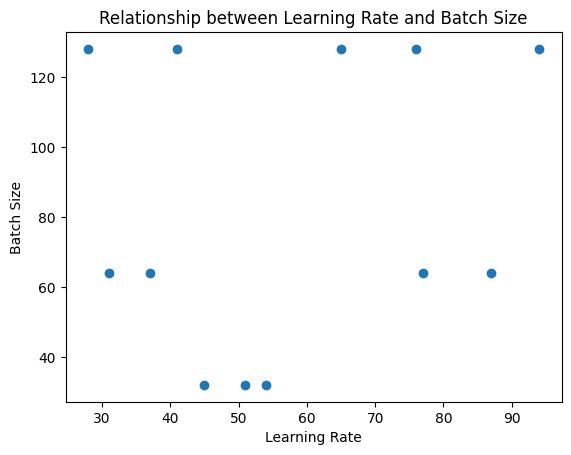

In [ ]:


# Assuming 'study' is your Optuna study object
# Get hyperparameter values for each trial
param1_values = [trial.params['epochs'] for trial in study.trials]
param2_values = [trial.params['batch_size'] for trial in study.trials]

# Scatter plot between two hyperparameters
plt.scatter(param1_values, param2_values)
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.title('Relationship between Learning Rate and Batch Size')
plt.show()

In [ ]:
import optuna.visualization as optuna_viz

optuna_viz.plot_contour(study)


In [ ]:
import optuna.visualization as optuna_viz

# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study)

# Adjust the size of the plot
contour_plot.update_layout(width=1800, height=1600)




In [ ]:

# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['epochs', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

In [ ]:
# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['dropout_rate', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

In [ ]:
# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['batch_size', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

## **Using best Hyper parameters train model**

In [ ]:
    base_model1 = EfficientNetV2B0(include_top=False, weights='imagenet',  input_shape=(224, 224, 3), pooling='avg')
    base_model1.trainable = False

    # Create a new model and set EfficientNetB2 as its input
    model = Sequential()
    model.add(base_model1)
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3892263644877882))
    model.add(Dense(12, activation='softmax'))

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.09956522756789522),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_hyper_model.h5",
                             monitor='val_accuracy',  # You can choose the metric to monitor (e.g., 'val_accuracy')
                             save_best_only=True,  # Save only the best model
                             mode='max',  # 'min' for loss, 'max' for accuracy, etc.
                             verbose=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
        )
datagen.fit(X_train)


In [ ]:
# Train the model
history=model.fit(datagen.flow(X_train, train_label,batch_size=32) ,epochs=51,  validation_data=(X_valid, valid_label), callbacks=[checkpoint])

Epoch 1/51
125/125 [==============================] - ETA: 0s - loss: 1.6033 - accuracy: 0.4496
Epoch 1: val_accuracy improved from -inf to 0.63691, saving model to best_hyper_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



125/125 [==============================] - 49s 336ms/step - loss: 1.6033 - accuracy: 0.4496 - val_loss: 1.0786 - val_accuracy: 0.6369
Epoch 2/51
125/125 [==============================] - ETA: 0s - loss: 0.9952 - accuracy: 0.6550
Epoch 2: val_accuracy improved from 0.63691 to 0.67703, saving model to best_hyper_model.h5
125/125 [==============================] - 40s 320ms/step - loss: 0.9952 - accuracy: 0.6550 - val_loss: 0.8093 - val_accuracy: 0.6770
Epoch 3/51
125/125 [==============================] - ETA: 0s - loss: 0.7731 - accuracy: 0.7282
Epoch 3: val_accuracy improved from 0.67703 to 0.71414, saving model to best_hyper_model.h5
125/125 [==============================] - 40s 323ms/step - loss: 0.7731 - accuracy: 0.7282 - val_loss: 0.7528 - val_accuracy: 0.7141
Epoch 4/51
125/125 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.7703
Epoch 4: val_accuracy improved from 0.71414 to 0.79739, saving model to best_hyper_model.h5
125/125 [=========================

### **CALLING SAVED MODEL**

In [ ]:
model1 = load_model('best_hyper_model.h5')

In [ ]:
print(os.path.getsize("best_hyper_model.h5")/1048576, "MB")

25.83116912841797 MB


In [ ]:
loss, acc = model1.evaluate(X_test,test_label)
loss1, acc1 = model1.evaluate(X_valid,valid_label)
loss2, acc2 = model1.evaluate(datagen.flow(X_valid,valid_label))
print('Test loss:', loss,'   Test accuracy:', acc)
print('Train loss:', loss1,'   Train accuracy:',acc1)
print('Train loss:', loss2,'   Train accuracy:',acc2)

32/32 [==============================] - 11s 303ms/step - loss: 0.2901 - accuracy: 0.8997
Test loss: 0.2913863956928253    Test accuracy: 0.8935018181800842
Train loss: 0.2903992533683777    Train accuracy: 0.902708113193512
Train loss: 0.2900923788547516    Train accuracy: 0.8996990919113159


18/18 [==============================] - 2s 13ms/step


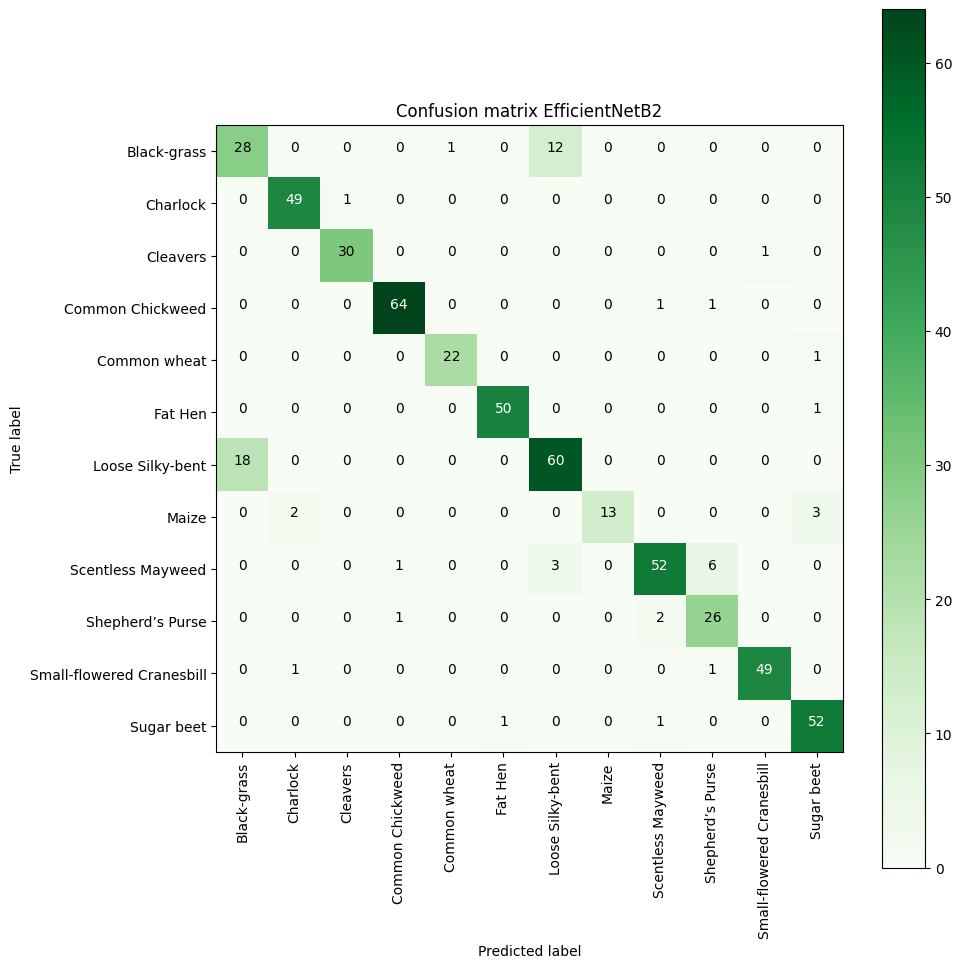

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix EfficientNetB2',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model1.predict(X_test)
predYClasses = np.argmax(predY, axis = 1)
trueY = np.argmax(test_label, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = class_names_lst)

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

0.8929854502473936
0.8935018050541517
0.8941580936973348
[0.64367816 0.96078431 0.96774194 0.96969697 0.95652174 0.98039216
 0.78431373 0.83870968 0.88135593 0.82539683 0.97029703 0.93693694]


In [ ]:
from sklearn.metrics import classification_report

# Define your title
title = "Classification Report EfficientNetB2"

# Calculate the padding to center the title
padding_length = (80 - len(title)) // 2

# Create the formatted title with centered and bold text
formatted_title = f"\033[1;32;47m{' ' * padding_length}{title}{' ' * padding_length}\033[m"

# Print the formatted title
print(formatted_title)

print(classification_report(trueY, predYClasses, target_names=class_names_lst))

                      Classification Report EfficientNetB2                      
                           precision    recall  f1-score   support

              Black-grass       0.61      0.68      0.64        41
                 Charlock       0.94      0.98      0.96        50
                 Cleavers       0.97      0.97      0.97        31
         Common Chickweed       0.97      0.97      0.97        66
             Common wheat       0.96      0.96      0.96        23
                  Fat Hen       0.98      0.98      0.98        51
         Loose Silky-bent       0.80      0.77      0.78        78
                    Maize       1.00      0.72      0.84        18
        Scentless Mayweed       0.93      0.84      0.88        62
         Shepherd’s Purse       0.76      0.90      0.83        29
Small-flowered Cranesbill       0.98      0.96      0.97        51
               Sugar beet       0.91      0.96      0.94        54

                 accuracy                     

**Observation:**



*   Recall is very low for Black-grass.
*   Precison is below .70 for Black grass.
*   Even from Confusion matrix, we see model did not perform well for black grass.
*   Other classes have better balane between precision and recall and a goof f1 score.

Overall Accuracy is also great.





In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(trueY, predYClasses)

array([[[495,  18],
        [ 13,  28]],

       [[501,   3],
        [  1,  49]],

       [[522,   1],
        [  1,  30]],

       [[486,   2],
        [  2,  64]],

       [[530,   1],
        [  1,  22]],

       [[502,   1],
        [  1,  50]],

       [[461,  15],
        [ 18,  60]],

       [[536,   0],
        [  5,  13]],

       [[488,   4],
        [ 10,  52]],

       [[517,   8],
        [  3,  26]],

       [[502,   1],
        [  2,  49]],

       [[495,   5],
        [  2,  52]]])

**Each plant category level TP, FP, FN, TN can be seen from above matrix:**

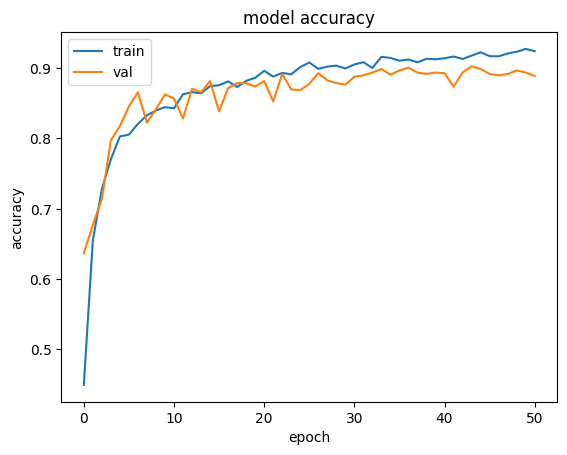

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()




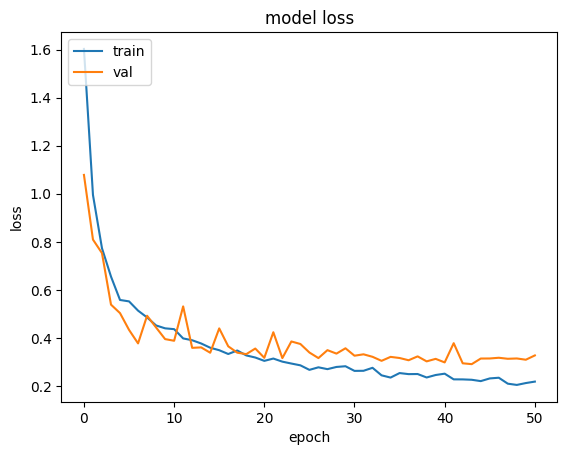

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Observation:**


*   Loss is decreasing and val loss is close to training loss
*   Accuracy of val set is also close to training accuracy
*   No overfitting or underfitting observerd based on the scores of val and testing sets





